In [62]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests
# maplotlib.rcParams['font.family'] = 'AppleGothic Gothic   # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

In [63]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [64]:
len(bream_length)     # 도미데이터 35개
len(smelt_length)     # 빙어데이터 14개

14

length -> 합치기
weight -> 합치기

datas = [ length, weight ] 합치기

train_input, test_input. train_target, test_target을 만들어보기

In [65]:
# 데이터의 전처리 과정을 해보세요!
# train_input, test_input, train_target, test_target

all_length = bream_length + smelt_length
len(all_length)  # 49개

all_weight = bream_weight + smelt_weight
len(all_weight)  # 49개

49

In [66]:
## 도미 : 1로 표시, 빙어 : 0으로 표시
results = [1]*35 + [0]*14

datas = []
for i in range(len(all_length)):
    couple = [all_length[i],all_weight[i],results[i]]
    datas.append(couple)

# datas

In [67]:
# zip() : 반복해서 각각 list 데이터를 1개씩 뽑아서 전달해줌
results = [1]*35 + [0]*14
datas = [ [l,w,r] for l,w,r in zip(all_length,all_weight,results)]
# datas

In [68]:
# 파이썬 random 함수를 사용해서
# 49개 중 35개 데이터는 train_input, train_target / 14개는 test_input, test_target에
# DataFrame을 사용하지 않고, for문을 사용해서 35 / 14 개를 분리해서 출력하시오.
index = np.arange(49)
np.random.shuffle(index)
# index[:35]
# datas[index[0]][:-1]

train_input = [ datas[i][:-1] for i in index[:35] ]
test_input = [ datas[i][:-1] for i in index[35:] ]

train_target = [ results[i] for i in index[:35] ]
test_target = [ results[i] for i in index[35:] ]


In [69]:
df_train = pd.DataFrame(train_input)
df_train.head(1)
df_test = pd.DataFrame(test_input)
df_test.head(1)

,0,1
0,31.0,500.0


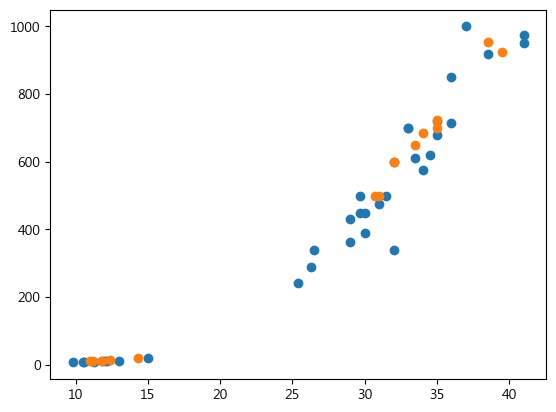

In [70]:
plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])

In [71]:
# datas_input = []
# for i in range(len(datas)):
#     input = datas[i][:-1]
#     datas_input.append(input)
# # datas_input = [[25.4, 242.0],[26.3, 190.0],[26.5, 340.0],[29.0, 363.0],...]

# datas_target = []
# for i in range(len(datas)):
#     target = datas[i][2]
#     datas_target.append(target)
# # datas_target  = [1,1,1,1,1,1,1,...,0,0,0]

In [72]:
# # 3/4, 1/4 비율로 랜덤하게 섞어서 할당해줌
# train_input,test_input,train_target,test_target = train_test_split(datas_input,datas_target)

In [73]:
# 2. 데이터 학습 시키기
from sklearn.neighbors import KNeighborsClassifier
# clf = svm.SVC()
clf = KNeighborsClassifier()
clf.fit(train_input,train_target)

# 3. 데이터 예측하기
pre = clf.predict(test_input)
print("예측 데이터값 : ",pre)

# 정확도 계산
# score = metrics.accuracy_score(test_target,pre)
score = clf.score(test_input,test_target)
print("정확도 계산 : ",score)

예측 데이터값 :  [1 1 1 0 0 0 0 0 1 1 1 1 1 1]
정확도 계산 :  1.0


In [74]:
# 길이가 30cm, 무게가 600.0인 고기가 무엇인지 판단하시오

new_input = [
    [30, 600.0]
]

pre = clf.predict(new_input)
print("예측 데이터값 : ",pre)


예측 데이터값 :  [1]


In [75]:
# 길이 25, 무게가 150.0 인 고기가 무엇인지 판단
new_input = [
    [30, 600.0],
    [25, 150.0]
]

pre = clf.predict(new_input)
print("예측 데이터값 : ",pre)

예측 데이터값 :  [1 0]


In [76]:
clf.kneighbors([[25,150]])

(array([[ 92.00086956, 130.48375378, 138.32150953, 138.39320793,
         140.00603558]]),
 array([[ 6, 32,  2, 15, 14]], dtype=int64))

In [77]:
# train_input 몇번째 index데이터를 사용했는지 알려줌
distance, indexs = clf.kneighbors([[25,150.0]])
indexs

array([[ 6, 32,  2, 15, 14]], dtype=int64)

In [78]:
df_train.iloc[indexs[0],0]

6     25.4
32    15.0
2     13.0
15    12.2
14    26.3
Name: 0, dtype: float64

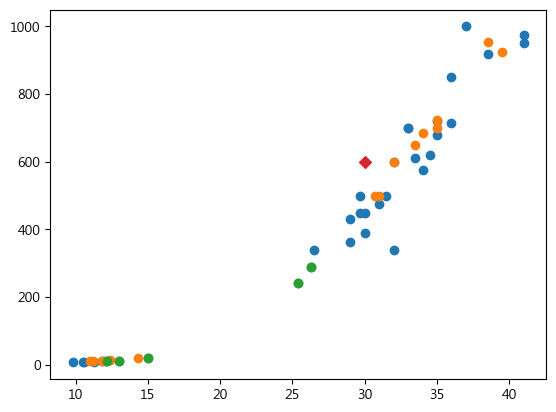

In [79]:
plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])
plt.scatter(new_input[0][0],new_input[0][1],marker='D')

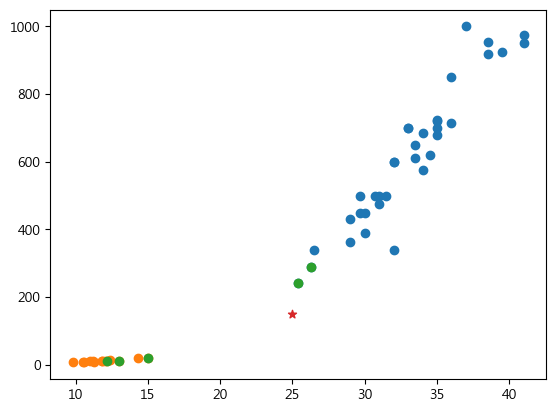

In [81]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(df_train.iloc[indexs[0],0],df_train.iloc[indexs[0],1])
plt.scatter(new_input[1][0],new_input[1][1],marker='*')

가로축 간의 차이보다, 세로축 간의 차이가 더 크기 때문에 빙어와 더 가깝다는 결론을 내렸을 것

ValueError: x and y must be the same size

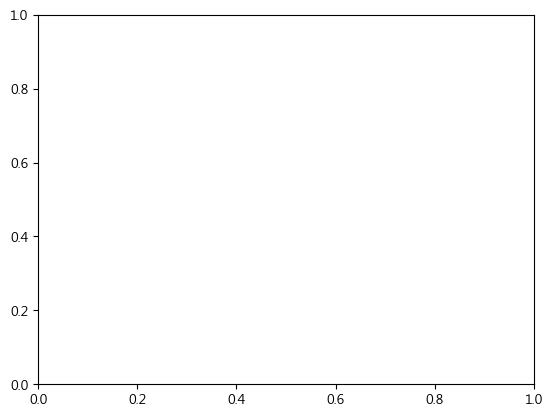

In [83]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(df_train.iloc[indexs[0],0],df_train.iloc[indexs[0],1])
plt.scatter(new_input[1][0],new_input[1][1],marker='*')
